<a href="https://colab.research.google.com/github/alejandromunizsiques/Ejercicios-Coding-Dojo/blob/main/%C2%BFQu%C3%A9_algoritmo_de_Agrupamiento_es_mejor%3F_Tarea_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones

Tu tarea es construir a partir de tu trabajo de segmentación de clientes utilizando KMeans de antes en este capítulo. Ahora, queremos usar métodos de agrupamiento adicionales y seleccionar el mejor algoritmo de agrupamiento para esta tarea. Realiza la segmentación de clientes mediante KMeans, agrupación jerárquica en clústeres y DBSCAN. Nos interesa agrupar a nuestros clientes en grupos basados en características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de forma eficaz. Usaremos la edad del cliente, la educación, los años de empleo, los ingresos, la deuda, si incumplieron y la relación deuda: ingresos para agruparlos en segmentos. Puedes descargar los datos aquí. La fuente original proviene de esta fuente.

# Importacion de librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score



# Montaje de dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Introducción al Machine Learning/cust_seg.csv')
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       700 non-null    int64  
 1   Customer Id      700 non-null    int64  
 2   Age              700 non-null    int64  
 3   Edu              700 non-null    int64  
 4   Years Employed   700 non-null    int64  
 5   Income           700 non-null    int64  
 6   Card Debt        700 non-null    float64
 7   Other Debt       700 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 60.2 KB


# Preprocesamiento (Escalamiento)

In [6]:
Scaler = StandardScaler()

Scaled_df = Scaler.fit_transform(df)

# Evaluacion agrupacion jerarquica

0.1805877776340726

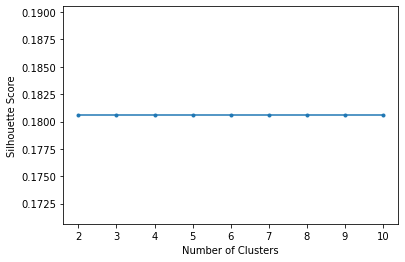

In [16]:
silhouette_scores = []
for i in range(2, 11):
  hc = AgglomerativeClustering(n_clusters = 3)
  hc.fit(Scaled_df)
  silhouette_scores.append(silhouette_score(Scaled_df, hc.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
silhouette_score(Scaled_df, hc.labels_)

# DBSCAN

-0.37689609640007715

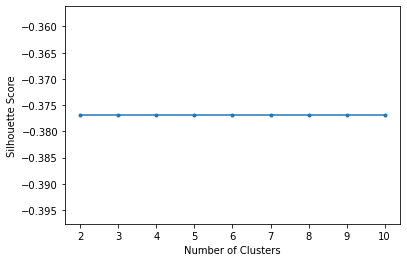

In [15]:
silhouette_scores = []
for i in range(2, 11):
  dbs = DBSCAN(eps = 0.5, min_samples = 2)
  dbs.fit(Scaled_df)
  silhouette_scores.append(silhouette_score(Scaled_df, dbs.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
silhouette_score(Scaled_df, dbs.labels_)

# Kmeans